# QUESTION -1


In [24]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
file_path = "delhi _ bangalore CPCB AIR QUALITY data 2017- 2020.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values if needed
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Create a 'City' column based on StationId for easy filtering
df['City'] = df['StationId'].apply(lambda x: "Delhi" if x.startswith("DL") else ("Bangalore" if x.startswith("KA") else "Other"))
df = df[df['City'].isin(["Delhi", "Bangalore"])]  # Keep only relevant cities

# Display first few rows
df.head()


C:\Users\New Fly High\AppData\Local\Temp\ipykernel_27148\1167846545.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City
0,DL001,2018-11-11,232.36,415.28,1.72,79.86,43.87,37.40,1.49,23.48,46.28,6.14,17.67,0.28,NaN,NaN,Delhi
1,DL001,2018-11-12,238.43,348.91,3.25,78.95,44.63,36.04,1.53,14.38,45.31,6.64,13.58,0.30,404.0,Severe,Delhi
2,DL001,2018-11-13,284.83,427.40,19.98,112.54,76.15,41.25,1.43,21.33,30.40,8.80,43.51,0.94,406.0,Severe,Delhi
3,DL001,2018-11-14,150.41,214.16,6.35,96.17,56.30,36.02,0.99,12.74,41.87,5.64,28.30,0.51,372.0,Very Poor,Delhi
4,DL001,2018-11-15,106.11,154.36,7.36,77.52,47.21,30.45,0.70,12.46,27.93,4.20,33.48,0.59,280.0,Poor,Delhi


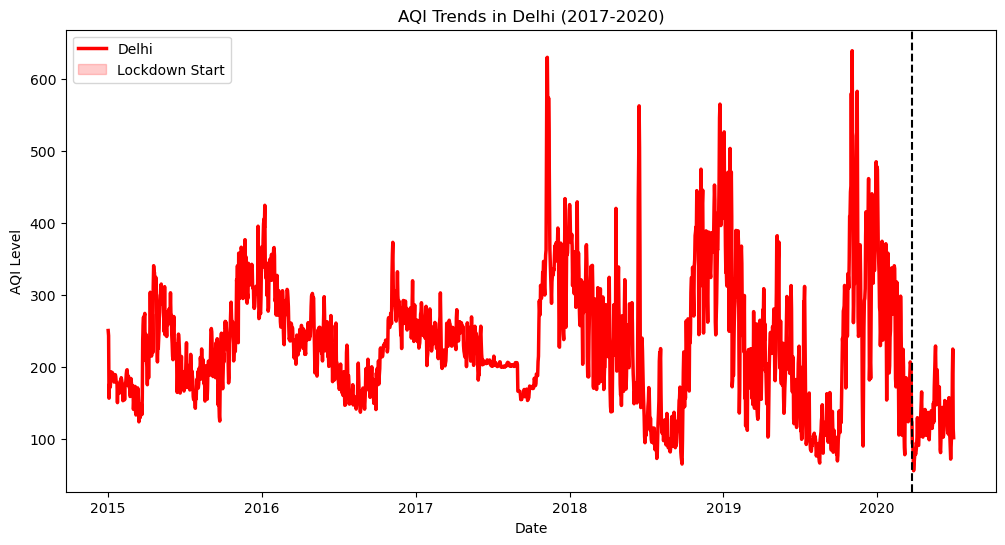

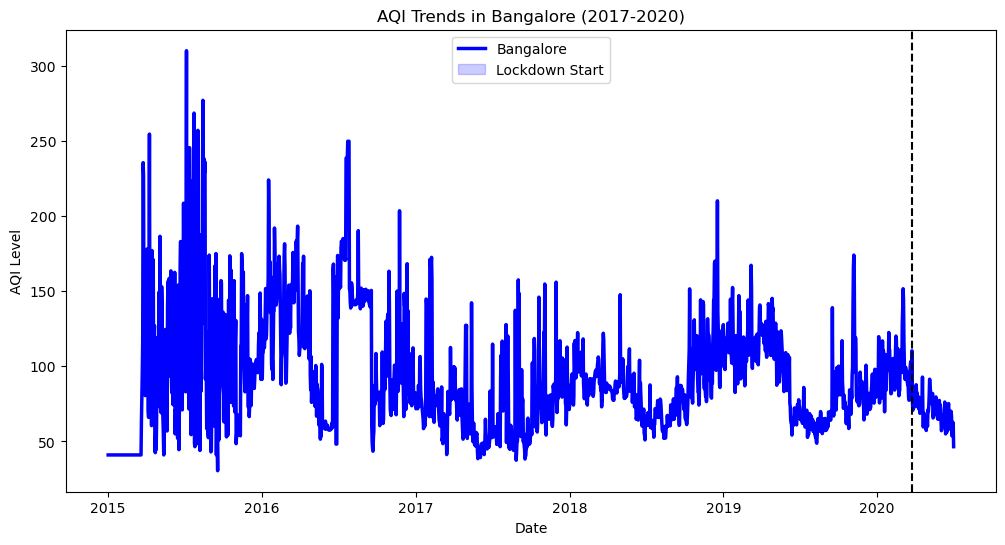

In [31]:
 #Plot AQI Trends for Delhi
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aqi_trends["Delhi"], color="red", linewidth=2.5)
plt.axvline(pd.to_datetime("2020-03-25"), color='black', linestyle='--', label="Lockdown Start")
plt.title("AQI Trends in Delhi (2017-2020)")
plt.xlabel("Date")
plt.ylabel("AQI Level")
plt.legend(["Delhi", "Lockdown Start"])
plt.show()

# Plot AQI Trends for Bangalore
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aqi_trends["Bangalore"], color="blue", linewidth=2.5)
plt.axvline(pd.to_datetime("2020-03-25"), color='black', linestyle='--', label="Lockdown Start")
plt.title("AQI Trends in Bangalore (2017-2020)")
plt.xlabel("Date")
plt.ylabel("AQI Level")
plt.legend(["Bangalore", "Lockdown Start"])
plt.show()

# QUESTION-2

In [26]:
# Select relevant pollutant columns
pollutant_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene", "AQI"]

# Compute correlation of AQI with pollutants for both cities
corr_results = df.groupby("City")[pollutant_cols].corrwith(df["AQI"]).drop("AQI", errors="ignore").unstack()

# Display correlation results
corr_results


c:\Users\New Fly High\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\New Fly High\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


         City     
PM2.5    Bangalore    0.333037
         Delhi        0.810886
PM10     Bangalore    0.349130
         Delhi        0.779215
NO       Bangalore    0.152426
         Delhi        0.449544
NO2      Bangalore    0.179250
         Delhi        0.395722
NOx      Bangalore    0.219125
         Delhi        0.458406
NH3      Bangalore    0.091776
         Delhi        0.148255
CO       Bangalore    0.269856
         Delhi        0.191885
SO2      Bangalore    0.043308
         Delhi        0.220804
O3       Bangalore    0.181466
         Delhi        0.213411
Benzene  Bangalore   -0.006005
         Delhi        0.265839
Toluene  Bangalore    0.053913
         Delhi        0.078576
Xylene   Bangalore         NaN
         Delhi        0.028916
AQI      Bangalore    1.000000
         Delhi        1.000000
dtype: float64

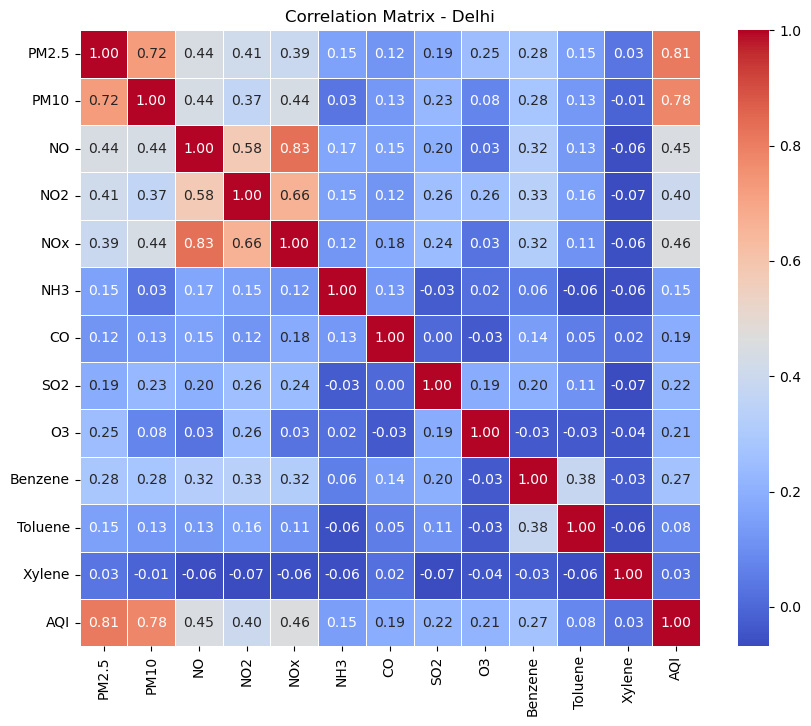

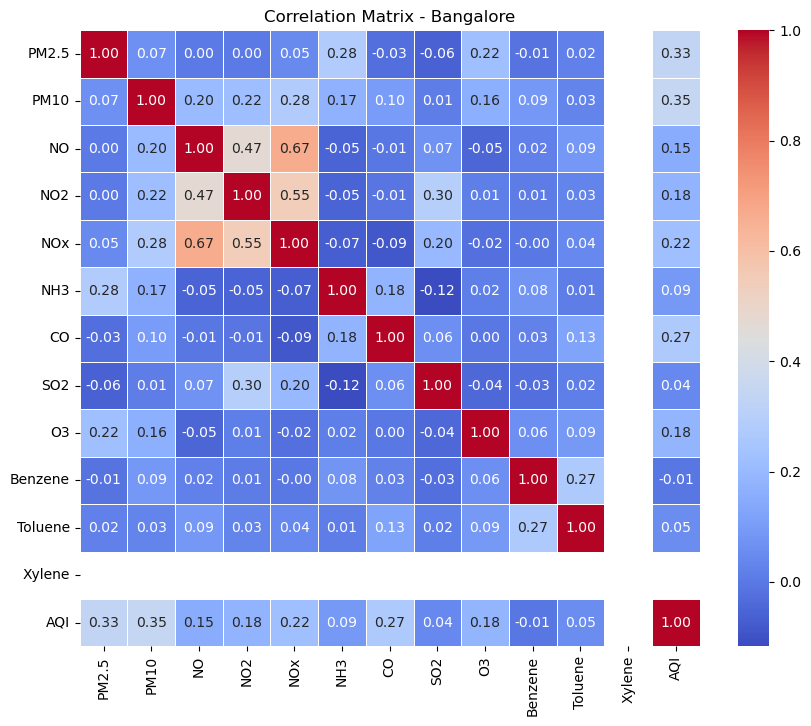

In [27]:
# Compute full correlation matrices for both cities
corr_matrix = df.groupby("City")[pollutant_cols].corr()

# Plot heatmaps for both cities
for city in ["Delhi", "Bangalore"]:
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix.loc[city], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Matrix - {city}")
    plt.show()


# QUESTION -3

In [28]:
# Apply Min-Max Scaling & Standardization
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df_scaled = df.copy()
df_scaled[pollutant_cols[:-1]] = scaler_minmax.fit_transform(df[pollutant_cols[:-1]])

df_standardized = df.copy()
df_standardized[pollutant_cols[:-1]] = scaler_standard.fit_transform(df[pollutant_cols[:-1]])

# Display first few rows after normalization
df_scaled.head(), df_standardized.head()


(  StationId       Date     PM2.5      PM10        NO       NO2       NOx  \
 0     DL001 2018-11-11  0.232345  0.425109  0.003638  0.200729  0.096713   
 1     DL001 2018-11-12  0.238415  0.357155  0.006894  0.198441  0.098388   
 2     DL001 2018-11-13  0.284816  0.437519  0.042490  0.282891  0.167875   
 3     DL001 2018-11-14  0.150393  0.219189  0.013490  0.241735  0.124115   
 4     DL001 2018-11-15  0.106092  0.157962  0.015639  0.194846  0.104076   
 
         NH3        CO       SO2        O3   Benzene   Toluene    Xylene  \
 0  0.089129  0.029824  0.119830  0.048038  0.019973  0.042938  0.002857   
 1  0.085882  0.030624  0.073309  0.047031  0.021599  0.033000  0.003062   
 2  0.098322  0.028623  0.108839  0.031548  0.028625  0.105730  0.009593   
 3  0.085834  0.019816  0.064925  0.043459  0.018346  0.068769  0.005205   
 4  0.072535  0.014011  0.063494  0.028983  0.013662  0.081357  0.006021   
 
      AQI AQI_Bucket   City  
 0    NaN        NaN  Delhi  
 1  404.0     Seve

# QUESTION- 4

In [49]:

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract city information from StationId
df['City'] = df['StationId'].apply(lambda x: 'Delhi' if x.startswith('DL') else ('Bangalore' if x.startswith('KA') else 'Other'))
df = df[df['City'].isin(["Delhi", "Bangalore"])]  # Keep only relevant cities

# Handle missing values: Drop 'Xylene' if it exists and fill missing pollutant values with median
if 'Xylene' in df.columns:
    df.drop(columns=['Xylene'], inplace=True)

pollutant_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene"]
df[pollutant_cols] = df[pollutant_cols].apply(lambda x: x.fillna(x.median()))
df.dropna(subset=['AQI'], inplace=True)  # Drop rows with missing AQI

# Separate data for Delhi and Bangalore
df_delhi = df[df["City"] == "Delhi"]
df_bangalore = df[df["City"] == "Bangalore"]

# Function to perform regression analysis
def regression_analysis(df, city_name):
    X = df[pollutant_cols]
    y = df["AQI"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    return {
        "City": city_name,
        "R2 Score": r2_score(y_test, y_pred),
        "Mean Absolute Error": mean_absolute_error(y_test, y_pred),
        "Root Mean Squared Error": mean_squared_error(y_test, y_pred, squared=False)
    }

# Perform regression analysis for both cities
results_delhi = regression_analysis(df_delhi, "Delhi")
results_bangalore = regression_analysis(df_bangalore, "Bangalore")


# Display results
results_delhi, results_bangalore



c:\Users\New Fly High\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\New Fly High\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


({'City': 'Delhi',
  'R2 Score': 0.8198955175887095,
  'Mean Absolute Error': 40.71975988225385,
  'Root Mean Squared Error': 55.49907117233763},
 {'City': 'Bangalore',
  'R2 Score': 0.558953517593521,
  'Mean Absolute Error': 21.301628318310577,
  'Root Mean Squared Error': 33.40290065766216})

In [50]:
#after normalization
# Apply Min-Max Scaling & Standardization
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df_scaled = df.copy()
df_scaled[pollutant_cols] = scaler_minmax.fit_transform(df[pollutant_cols])

df_standardized = df.copy()
df_standardized[pollutant_cols] = scaler_standard.fit_transform(df[pollutant_cols])

# Display first few rows after normalization
df_scaled.head(), df_standardized.head()

# Perform regression analysis for both cities after normalization
results_delhi_scaled = regression_analysis(df_scaled[df_scaled["City"] == "Delhi"], "Delhi (Normalized)")
results_bangalore_scaled = regression_analysis(df_scaled[df_scaled["City"] == "Bangalore"], "Bangalore (Normalized)")

# Perform regression analysis for both cities after standardization
results_delhi_standardized = regression_analysis(df_standardized[df_standardized["City"] == "Delhi"], "Delhi (Standardized)")
results_bangalore_standardized = regression_analysis(df_standardized[df_standardized["City"] == "Bangalore"], "Bangalore (Standardized)")

# Display results
results_delhi_scaled, results_bangalore_scaled, results_delhi_standardized, results_bangalore_standardized



c:\Users\New Fly High\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\New Fly High\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\New Fly High\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\New Fly High\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

({'City': 'Delhi (Normalized)',
  'R2 Score': 0.8198955175887095,
  'Mean Absolute Error': 40.71975988225383,
  'Root Mean Squared Error': 55.49907117233763},
 {'City': 'Bangalore (Normalized)',
  'R2 Score': 0.558953517593521,
  'Mean Absolute Error': 21.301628318310573,
  'Root Mean Squared Error': 33.40290065766216},
 {'City': 'Delhi (Standardized)',
  'R2 Score': 0.8198955175887095,
  'Mean Absolute Error': 40.71975988225381,
  'Root Mean Squared Error': 55.49907117233763},
 {'City': 'Bangalore (Standardized)',
  'R2 Score': 0.558953517593521,
  'Mean Absolute Error': 21.301628318310573,
  'Root Mean Squared Error': 33.40290065766216})

# QUESTION -5

In [41]:
# Function to perform PCA analysis
def perform_pca(df, city_name):
    X = df[pollutant_cols]
    
    # Normalize data before PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    return {
        "City": city_name,
        "Explained Variance Ratio": pca.explained_variance_ratio_,
        "Cumulative Variance": np.cumsum(pca.explained_variance_ratio_)
    }

# Perform PCA for both cities
pca_results_delhi = perform_pca(df_delhi, "Delhi")
pca_results_bangalore = perform_pca(df_bangalore, "Bangalore")


pca_results_delhi, pca_results_bangalore

({'City': 'Delhi',
  'Explained Variance Ratio': array([0.32897385, 0.11455759, 0.11077332, 0.08985522, 0.08624104,
         0.07831015, 0.07006575, 0.05137383, 0.03455405, 0.02198726,
         0.01330793]),
  'Cumulative Variance': array([0.32897385, 0.44353145, 0.55430476, 0.64415999, 0.73040102,
         0.80871118, 0.87877693, 0.93015075, 0.96470481, 0.98669207,
         1.        ])},
 {'City': 'Bangalore',
  'Explained Variance Ratio': array([0.21335778, 0.14327056, 0.11422019, 0.10070647, 0.09135376,
         0.08190159, 0.07458887, 0.05827126, 0.05154216, 0.04345152,
         0.02733584]),
  'Cumulative Variance': array([0.21335778, 0.35662834, 0.47084853, 0.571555  , 0.66290876,
         0.74481034, 0.81939922, 0.87767048, 0.92921264, 0.97266416,
         1.        ])})

In [51]:
# pca on normalized data
# Perform PCA for both cities after normalization
pca_results_delhi_scaled = perform_pca(df_scaled[df_scaled["City"] == "Delhi"], "Delhi (Normalized)")
pca_results_bangalore_scaled = perform_pca(df_scaled[df_scaled["City"] == "Bangalore"], "Bangalore (Normalized)")

# Perform PCA for both cities after standardization
pca_results_delhi_standardized = perform_pca(df_standardized[df_standardized["City"] == "Delhi"], "Delhi (Standardized)")
pca_results_bangalore_standardized = perform_pca(df_standardized[df_standardized["City"] == "Bangalore"], "Bangalore (Standardized)")

pca_results_delhi_scaled, pca_results_bangalore_scaled, pca_results_delhi_standardized, pca_results_bangalore_standardized


({'City': 'Delhi (Normalized)',
  'Explained Variance Ratio': array([0.38189545, 0.11048432, 0.10365798, 0.08158227, 0.0802001 ,
         0.0707671 , 0.0621819 , 0.04820565, 0.03063261, 0.02062936,
         0.00976325]),
  'Cumulative Variance': array([0.38189545, 0.49237977, 0.59603775, 0.67762002, 0.75782012,
         0.82858722, 0.89076913, 0.93897478, 0.96960739, 0.99023675,
         1.        ])},
 {'City': 'Bangalore (Normalized)',
  'Explained Variance Ratio': array([0.23016166, 0.14856871, 0.12226185, 0.10729989, 0.08664703,
         0.08182793, 0.06829233, 0.05602816, 0.04361244, 0.03573293,
         0.01956706]),
  'Cumulative Variance': array([0.23016166, 0.37873038, 0.50099223, 0.60829211, 0.69493915,
         0.77676708, 0.84505941, 0.90108757, 0.94470001, 0.98043294,
         1.        ])},
 {'City': 'Delhi (Standardized)',
  'Explained Variance Ratio': array([0.38189545, 0.11048432, 0.10365798, 0.08158227, 0.0802001 ,
         0.0707671 , 0.0621819 , 0.04820565, 0.030632